In [27]:
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fashion-mnist_train.csv',sep=',')
# train_df = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fashion-mnist_test.csv', sep = ',')

# New Section

In [3]:
!pip install keras

In [31]:
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import TensorBoard

import numpy as np 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [28]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

In [7]:
train_data

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
train_data.shape

(60000, 785)

In [10]:
train_data[0][0]

2.0

In [23]:
train_data[0]

array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   4.,   0.,   0.,   0.,   0.,   0.,  62.,  61.,  21.,  29.,
        23.,  51., 136.,  61.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  88.,
       201., 228., 225., 255., 115.,  62., 137., 255., 235., 222., 255.,
       135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  47., 252., 234., 238., 22

In [24]:
# train_dct = {}
# for i in range (len(train_data)):
#   if i not in train_dct:
#     train_dct[train_data[i][0]] = 1
#   else:
#     train_dct[train_data[i][0]] += 1
# for i in range(len(train_data)):
#   print(train_data[0][i])
train_df.shape

(60000, 785)

In [29]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

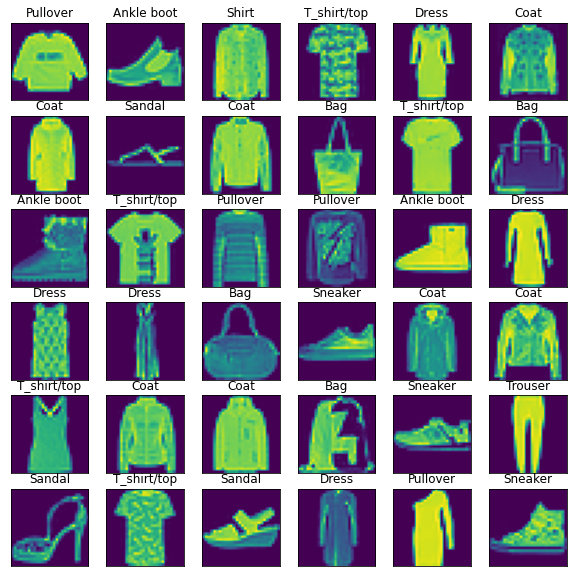

In [30]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()


In [32]:
input_layer = layers.Input(shape=(784,))
encoding_layer1 = layers.Dense(32,activation="relu")(input_layer)
encoding_layer2 = layers.Dense(16,activation="relu")(encoding_layer1)
decoding_layer1 = layers.Dense(32,activation="relu")(encoding_layer2)
# We've used sigmoid because we've scaled our images between 0 and 1
decoding_layer2 = layers.Dense(784,activation="sigmoid")(decoding_layer1)

autoencoder = keras.Model(inputs=input_layer,outputs=decoding_layer2)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 52,064
Trainable params: 52,064
Non-trainable params: 0
_________________________________________________________________


In [35]:
autoencoder.compile(loss="binary_crossentropy",optimizer="RMSprop")

In [36]:
autoencoder.fit(x_train,x_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3369
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3053
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2997
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2970
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2952
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2939
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2931
Epoch 8/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2925
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2919
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2914
Epoch 11/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2910
Epoch 12/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2907
E

In [37]:
autoencoded = autoencoder.predict(x_test)

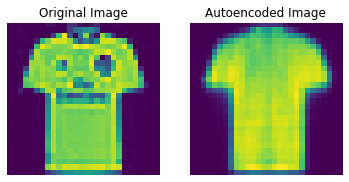

In [38]:
fig = plt.figure(figsize=(6,6))

fig.add_subplot(1,2,1)
plt.title("Original Image")
plt.imshow(x_test[0].reshape(28,28))
plt.axis("off")


fig.add_subplot(1,2,2)
plt.title("Autoencoded Image")
plt.imshow(autoencoded[0].reshape(28,28))
plt.axis("off")

plt.show()

In [39]:
import time
def KNN(label,x_train,y_train,x_test,y_test):
    
    trainStart = time.time()
    
    clf = KNeighborsClassifier()
    
    clf.fit(x_train,y_train)
    
    y_pred = clf.predict(x_test)
    
    trainEnd = time.time()
    
    trainTook = round(trainEnd-trainStart,2)
    
    
    testStart = time.time()
    
    print("Accuracy of {} KNN is %{}".format(label,accuracy_score(y_pred=y_pred,y_true=y_test)))
    
    confmatrix = confusion_matrix(y_pred=y_pred,y_true=y_test)
    
    plt.subplots(figsize=(6,6))
    sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
    plt.show()
    
    testEnd = time.time()
    
    testTook = round(testEnd-testStart,2)
    
    print("Training {} KNN took {} seconds".format(label,trainTook))
    print("Testing {} KNN took {} seconds".format(label,testTook))

Accuracy of Without Encoding KNN is %0.8589


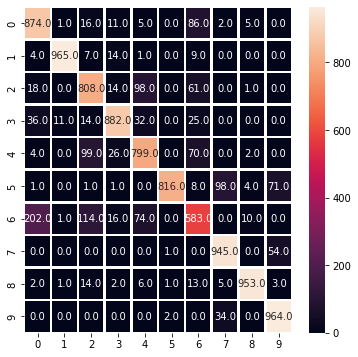

Training Without Encoding KNN took 43.59 seconds
Testing Without Encoding KNN took 0.58 seconds


In [40]:
KNN("Without Encoding",x_train,y_train,x_test,y_test)

In [41]:
encoder = keras.Model(inputs=input_layer,outputs=encoding_layer2)
train_codes = encoder.predict(x_train)
test_codes = encoder.predict(x_test)

In [42]:
train_codes.shape

(60000, 16)

Accuracy of With Encoding KNN is %0.8425


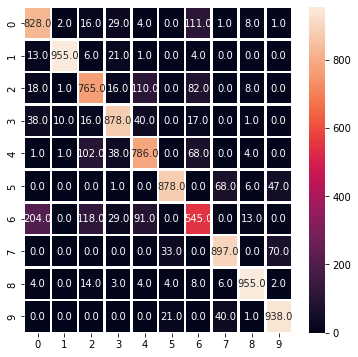

Training With Encoding KNN took 15.9 seconds
Testing With Encoding KNN took 0.6 seconds


In [43]:
KNN("With Encoding",train_codes,y_train,test_codes,y_test)